In [12]:
""" Linear Regression Model is created and trained. It is converted into TFLite Model and then also interpreted.
Finally, it is saved on our local device. """

# imports
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
import numpy as np

In [4]:
# Linear Regression Model
x = [-1,0,1,2,3,4]
y = [-3,-1,1,3,5,7]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(x, y, epochs=10, verbose=1)

Train on 6 samples
Epoch 1/10
6/6 [==============================] - 1s 228ms/sample - loss: 24.5408
Epoch 2/10
6/6 [==============================] - 0s 4ms/sample - loss: 19.5957
Epoch 3/10
6/6 [==============================] - 0s 3ms/sample - loss: 15.6993
Epoch 4/10
6/6 [==============================] - 0s 4ms/sample - loss: 12.6279
Epoch 5/10
6/6 [==============================] - 0s 5ms/sample - loss: 10.2058
Epoch 6/10
6/6 [==============================] - 0s 4ms/sample - loss: 8.2947
Epoch 7/10
6/6 [==============================] - 0s 5ms/sample - loss: 6.7856
Epoch 8/10
6/6 [==============================] - 0s 5ms/sample - loss: 5.5931
Epoch 9/10
6/6 [==============================] - 0s 4ms/sample - loss: 4.6496
Epoch 10/10
6/6 [==============================] - 0s 6ms/sample - loss: 3.9022


In [5]:
# Saving as SavedModel
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/1/assets


In [6]:
# Converting SavedModel to tfLite model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

# Empty tflite model file is created and then it is written with converted model
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

792

In [7]:
# Interpreting tfLite model to check if it works properly
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Getting input output tensors
input_tensors = interpreter.get_input_details()
output_tensors = interpreter.get_output_details()

In [19]:
input_tensors

[{'name': 'dense_1_input',
  'index': 3,
  'shape': array([1, 1], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)}]

In [10]:
output_tensors

[{'name': 'Identity',
  'index': 0,
  'shape': array([1, 1], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)}]

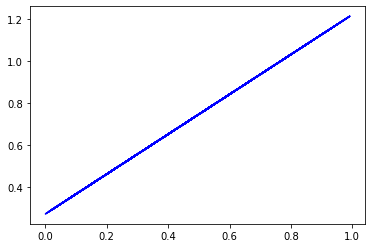

In [25]:
# Test TFLite model on random input data
input_shape = input_tensors[0]['shape']
inputs, outputs = [], []
for _ in range(100):    
    input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
    interpreter.set_tensor(input_tensors[0]['index'], input_data)
    interpreter.invoke()
    tflite_results = interpreter.get_tensor(output_tensors[0]['index'])
    
    # Testing Tf model on random input data
    tf_results = model(tf.constant(input_data))
    output_data = np.array(tf_results)
    
    inputs.append(input_data[0][0])
    outputs.append(output_data[0][0])

plt.plot(inputs,outputs, 'b')

In [ ]:
# Download the tfLite model. Not doing this now cause files is not installed
files.download(tflite_model_file)